In [1]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/train.csv")

In [3]:
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [14]:
follower_and_fake=df[['fake','#follows']]
follower_and_fake

,fake,#follows
0,0,955
1,0,533
2,0,98
3,0,651
4,0,126
...,...,...
571,1,596
572,1,75
573,1,339
574,1,73


In [15]:
follower_and_fake['fake']==1

0      False
1      False
2      False
3      False
4      False
       ...  
571     True
572     True
573     True
574     True
575     True
Name: fake, Length: 576, dtype: bool

In [16]:
fake=follower_and_fake['#follows'][follower_and_fake['fake']==1]
fake

288    333
289     31
290    445
291     80
292    309
      ... 
571    596
572     75
573    339
574     73
575    487
Name: #follows, Length: 288, dtype: int64

In [17]:
genuine=follower_and_fake['#follows'][follower_and_fake['fake']==0]
genuine

0       955
1       533
2        98
3       651
4       126
       ... 
283    1213
284     294
285     408
286      22
287     114
Name: #follows, Length: 288, dtype: int64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d2087c760>,
      dtype=object)

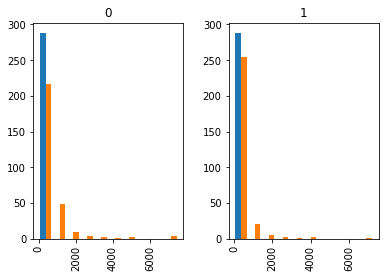

In [19]:
follower_and_fake.hist(by='fake')

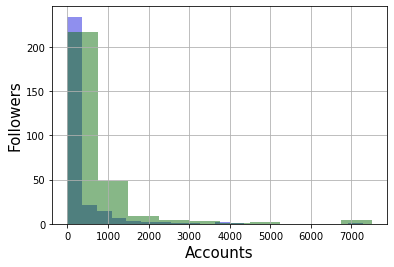

In [22]:
import seaborn as sns
fake.hist(histtype='stepfilled', color=sns.desaturate("blue", .75),alpha=.5, bins=20)   # default number of bins = 10
genuine.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("green", .75), bins=10)
plt.xlabel('Accounts',fontsize=15)
plt.ylabel('Followers',fontsize=15)
plt.show()

  The distribution of followers of fake accounts appears to be shifted slightly to the left of the distribution corresponding to genuine accounts.The followers of fake account seem to be lower on average than the genuine accounts

In [23]:
means_table = follower_and_fake.groupby('fake').mean()

In [24]:
means_table

,#follows
fake,
0,714.597222
1,302.166667


In [53]:
observed_difference = means_table['#follows'][0] - means_table['#follows'][1]
observed_difference

412.4305555555555

In [54]:
follower_and_fake

,fake,#follows
0,0,955
1,0,533
2,0,98
3,0,651
4,0,126
...,...,...
571,1,596
572,1,75
573,1,339
574,1,73


In [55]:
shuffled = follower_and_fake.sample(576,replace = False)
shuffled

,fake,#follows
116,0,1093
426,1,227
100,0,413
545,1,88
84,0,526
...,...,...
136,0,7202
326,1,49
252,0,77
450,1,474


In [56]:
shuffled_followers = shuffled['#follows']

In [57]:
original_and_shuffled= follower_and_fake.assign(shuffled_followers=shuffled_followers.values )

In [58]:
original_and_shuffled

,fake,#follows,shuffled_followers
0,0,955,1093
1,0,533,227
2,0,98,413
3,0,651,88
4,0,126,526
...,...,...,...
571,1,596,7202
572,1,75,49
573,1,339,77
574,1,73,474


In [59]:
all_group_means= original_and_shuffled.groupby('fake').mean()
all_group_means

,#follows,shuffled_followers
fake,,
0,714.597222,503.753472
1,302.166667,513.010417


In [60]:
difference = all_group_means['shuffled_followers'][0]- all_group_means['shuffled_followers'][1]
difference

-9.2569444444444

permutation test

In [61]:
import numpy as np
import array
differences = np.zeros(5000)

In [62]:
for i in np.arange(5000):
    follower_and_fake = df[['fake', '#follows']]
    shuffled = follower_and_fake.sample(576,replace = False)
    shuffled_followers = shuffled['#follows']
    original_and_shuffled = follower_and_fake.assign(shuffled_followers=shuffled_followers.values )
    all_group_means= original_and_shuffled.groupby('fake').mean()
    difference = all_group_means['shuffled_followers'][0]- all_group_means['shuffled_followers'][1]
    differences[i] = difference

In [67]:
differences

array([ 170.45138889, -124.33333333, -161.52777778, ...,  -34.40277778,
        -26.49305556,  100.63888889])

In [68]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,170.451389
1,-124.333333
2,-161.527778
3,7.791667
4,47.597222
...,...
4995,-32.555556
4996,11.291667
4997,-34.402778
4998,-26.493056


Observed Difference: 412.4305555555555


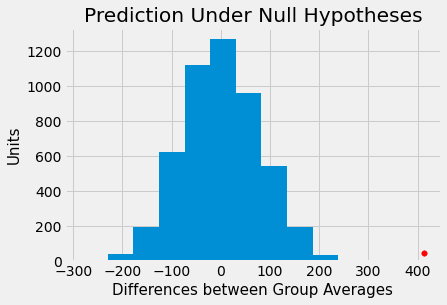

In [73]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 50, color='red', s=30)
print('Observed Difference:', observed_difference)

In [74]:
np.count_nonzero(differences >= observed_difference)/differences.size

0.0